# 方程求解
---

求解代数方程组是科学和技术领域中的常见问题。相对于线性方程组，非线性方程组通常较难求解。线性方程是求解非线性问题局部近似解的重要工具。例如，考虑某个展开点附近非常小的变动，非线性系统通常可以使用展开点附近的线性西戎来近似。对于非线性问题的全局分析，一般需要采用迭代方式来逐步构建对解越来越精确的估计

本部分我们将使用SymPy对方程进行符号化求解，使用SciPy的线性代数模块来对方程组进行数值求解。为了解决非线性问题，我们将使用SciPy的optimize模块的`root-finding`函数。

## 导入模块
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()

## 线性方程组
---
我们已经在SymPy库中使用了线性代数功能。NumPy和SciPy也有线性代数模块，分别是numpy.linalg和scipy.linalg，它们都为数值问题提供线性代数问题。

[线性方程组](https://zh.m.wikipedia.org/wiki/%E7%BA%BF%E6%80%A7%E6%96%B9%E7%A8%8B%E7%BB%84)是数学方程组的一种，它符合以下的形式：

$$ \begin{cases}
a_{1,1}x_{1} + a_{1,2}x_{2} + \cdots + a_{1,n}x_{n}=  b_{1} \\
a_{2,1}x_{1} + a_{2,2}x_{2} + \cdots + a_{2,n}x_{n}=  b_{2} \\
\vdots \quad \quad \quad \vdots \\
a_{m,1}x_{1} + a_{m,2}x_{2} + \cdots + a_{m,n}x_{n}=  b_{m} 
\end{cases} $$

这是一个包含m个方程、n个未知数的线性方程组。处理线性方程组时，将其写为矩阵的形式会更方便：

$$ \mathbf{A} \mathbf{x} = \mathbf{b} $$

其中

$$\mathbf A=
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n}
\end{bmatrix},\quad
\mathbf{x}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix},\quad
\mathbf{b}=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}$$

根据矩阵$A$的性质，解$x$可能存在也可能不存在。如果方程组中$m < n$，那么称之为欠定（underdetermined）方程组，不能完全确定唯一解。如果 $m < n$，称之为超定（overdetermined）方程组。这通常会带来约束冲突，导致解不存在。

### 方形方程组

方形方程组（$m = n$）是一个最重要的特例。当方程的数目等于未知数的数目，可能存在唯一解。

有唯一解的前提是矩阵$A$必须是非奇异的，也就是$A$存在逆矩阵，解可以写为$x = A^{-1}b$。

如果行列式为0，即$detA = 0$，则方程组无解或有无穷多解。

对于秩不足的矩，即$rank(A) < n$，矩阵中有的行或者列可以便是成其它行或者列的线性组合，方程组实际上是欠定的。

当$A$满秩时，一定存在解，但是可能无法精确计算解。矩阵的条件数$cond(A)$给出了线性方程组好坏的条件。条件数接近1，方程组是条件良态；条件数很大，方程组是条件病态的。对于病态方程组，即使向量$b$发生非常微小的扰动，也会让解$x$产生很大的误差。这在使用浮点数的数值解中尤其需要注意，因为浮点数只是实数的近似值。

例如，对于如下包含两个线性方程的方程组：

$$\begin{cases} 
2 x_1 + 3 x_2 = 4 \\
5 x_1 + 4 x_2 = 3
\end{cases}$$ 

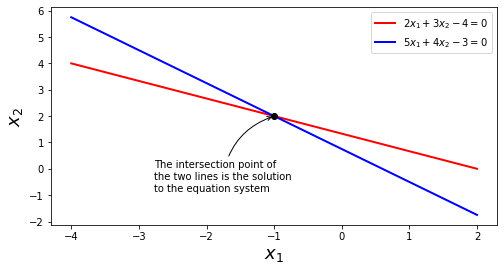

In [2]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")

A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
x = la.solve(A, b)

ax.plot(x[0], x[1], 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(x[0], x[1]), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend()

#### **符号计算**

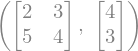

In [3]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A, b

In [4]:
A.rank()  # 满秩有解

In [5]:
A.norm()  # 范数

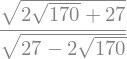

In [6]:
A.condition_number()

In [7]:
sympy.N(A.condition_number(), 4)  # 等价于方法.evalf(4)

求解线性问题最直接的方法是计算矩阵$A$的逆矩阵，但这不是找到解向量$x$的最有效的方法。更好的方法是对矩阵$A$进行[$LU$分解](https://zh.m.wikipedia.org/wiki/LU%E5%88%86%E8%A7%A3)，即$A=LU$，其中$L$是下三角矩阵，$U$是上三角矩阵。

在SymPy中，可以使用`sympy.Matrix`类的`LUdecomposition`方法进行符号$LU$分解。该方法会返回两个新的Matrix对象、$L$和$U$矩阵以及一个行交换矩阵。当我们想要求解$Ax=b$的方程时，不需要显示计算$L$和$U$矩阵，而是使用`LUsolve`方法。

In [8]:
L, U, P = A.LUdecomposition()

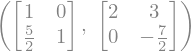

In [9]:
L, U

In [10]:
L * U == A

True

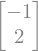

In [11]:
x = A.LUsolve(b)
x

#### **数值计算**

对于数值问题，可以使用SciPy线性代数模块的`la.lu`函数。该函数返回置换矩阵$P$以及$L$和$U$矩阵，是的$A=PLU$。与SymPy情况一样，我们不需要显示计算$L$和$U$矩阵，而是使用`la.solve`来求解线性方程组，该函数将矩阵$A$和向量$b$作为参数。

In [12]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [13]:
np.linalg.matrix_rank(A)

2

In [14]:
np.linalg.norm(A)

In [15]:
np.linalg.cond(A)

In [16]:
P, L, U = la.lu(A)

In [17]:
L, U

(array([[1. , 0. ],
        [0.4, 1. ]]),
 array([[5. , 4. ],
        [0. , 1.4]]))

In [18]:
P@L@U == A # 等价于 np.dot(P, np.dot(L, U))

array([[ True,  True],
       [ True,  True]])

In [19]:
la.solve(A, b)

array([-1.,  2.])

下面我们将演示符号方法和数值方法的区别，并且说明数值方法对大条件数的方程组很敏感。在这个例子中我们将求解的方程组如下：

$$ \begin{bmatrix}
1 & \sqrt{p}  \\
1 & \frac{1}{\sqrt{p}}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

当$p$=1时，该方程组是奇异的。当$p$是1附近的值时，方程组是病态条件的。我们使用SymPy可以很容易找到解：

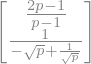

In [20]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
A.solve(b)

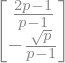

In [21]:
sympy.simplify(_)  # 此处下划线`_`表示上次运行结果

符号解是精确的（如果能找到），数值解的误差是由浮点数引起的，本例中二者的差异与参数p的关系如下图所示:

Text(0.5, 0, '$p$')

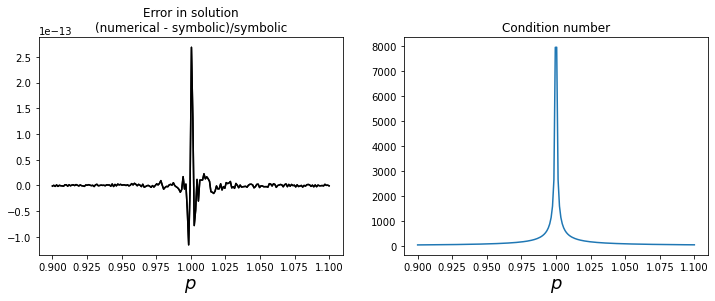

In [22]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

# Solve symbolically
x_sym_sol = A.solve(b)
x_sym_sol.simplify()
x_sym_sol
Acond = A.condition_number().simplify()

# Function for solving numerically
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(numerical - symbolic)/symbolic")
axes[0].set_xlabel(r'$p$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$p$', fontsize=18)

### 矩形方程组

#### **欠定方程组**

欠定方程组的变量数比方程数多，解无法唯一确定，必须用自由变量来表示。通常需要用符号方法来处理。

$$ \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
7 \\
8
\end{bmatrix}
$$

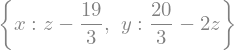

In [23]:
x_vars = sympy.symbols("x, y, z")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

#### **超定方程组**

对于超定方程组，方程的数量比未知变量更多。我们为方形方程组谈论中使用的示例方程组增加一个条件：

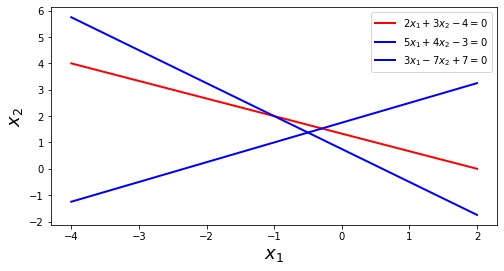

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4
x2_3 = (7 + 3 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2-4=0$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2-3=0$")
ax.plot(x1, x2_3, 'b', lw=2, label=r"$3x_1-7x_2+7=0$")

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend()

三个直线之间不一定存在交点。我们拥有的约束条件比自由度多，这种情况下方程组通常没有精确解。此时，我们通常需要尝试为超定方程组寻找近似解。

数据拟合就是这种情况的佐证：假设有一个模型，变量$y$是变量$x$的二次多项式，$y=A+bx+cx^2$。这里变量$y$是变量$x$的关系是非线性的，但是三个未知数$A$、$B$和$C$是线性的。因此，我们可以将该模型写成一个线性方程组。如果我们采集了m组数据$\{(x_i, y_i)\}^m_{i=1}$，就可以将该模型写成如下$m×3$的方程组：

$$ \begin{bmatrix}
1 & x_1 & x_1^2 \\
\vdots & \vdots & \vdots \\
1 & x_m & x_m^2
\end{bmatrix}
\begin{bmatrix}
A \\
B \\
C
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
\vdots \\
y_m
\end{bmatrix}
$$

如果$m>3$，那么通常没有精确解，需要引入近似解，为超定方程组$Ax \approx b$给出最佳拟合。针对这种方程组最佳拟合的一种自然定义是最小误差平方和$\min_x  \sum_{i=1}^{m} r_i^2 $，其中$r= b-Ax$是残差向量。在SymPy中，可以使用`solve_least_squares`方法来求解超定方程组的最小二乘解。对于数值问题，可以使用SciPy中的`la.lstsq`函数。

下面的代码演示了使用SciPy的`la.lstsq`函数进行数据拟合。我们首先定义模型的真实参数，然后在真实的模型关系中加入随机噪声模拟测量数据。最后，我们使用`la.lstsq`函数对参数A、B和C进行拟合。

[0.75923173 2.03586084 3.83720879]


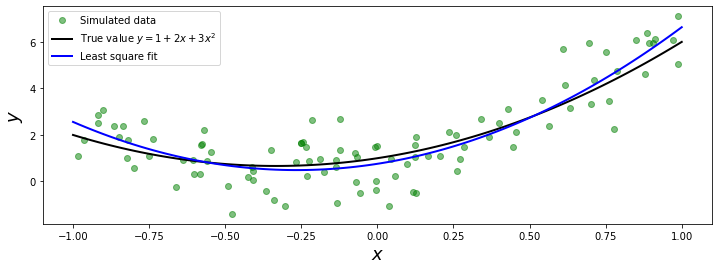

In [25]:
np.random.seed(1234)

# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data points
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])  # see np.vander for alternative
sol, r, rank, sv = la.lstsq(A.T, Y)
print(sol)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

想让数据与模型很好地拟合，显然要求用于描述数据的模型能够很好地与生成数据地过程对应，并能够有效地去除可能存在随机误差。我们把前一个示例中的数据你和到一个线性模型和一个高阶多项式。前者是欠拟合，因为使用的模型过于简单。后者是过拟合，不仅拟合了数据的潜在趋势，也拟合了测量噪声。

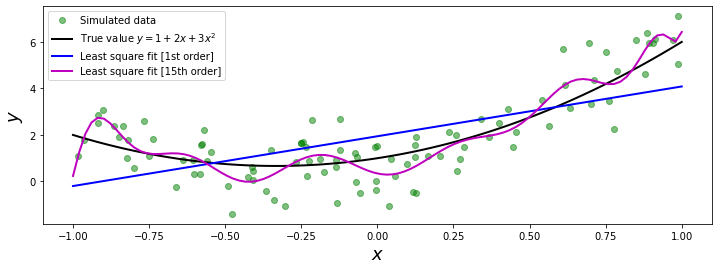

In [26]:
# fit the data to the model using linear least square: 
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

## 特征值问题
---

一种非常重要的特殊方程是[特征值方程](https://zh.wikipedia.org/wiki/特征值和特征向量)$Ax=\lambda x$，其中$A$是一个N×N的方阵，$x$是未知向量，$\lambda$是未知标量。这里$x$是矩阵$A$的特征向量，$\lambda$是矩阵$A$的特征值。特征向量$x$经过矩阵$A$的线性变换后，得到的新向量仍然与原来的$x$保持在同一条直线上，但其长度或方向也许会改变。量子力学中的薛定谔方程就是特征值方程。

求解这类特征问题的标准方式是将方程写为$(A-I\lambda)x=0$的形式。如果存在非平凡解$x\neq0$，那么矩阵$A-I\lambda$必须是奇异的，其行列式必须为0，即$\det(A-I\lambda)x=0$。这将得到一个N阶多项式（特征多项式），它的N个跟会给出N个特征值。一旦特征值已知，就可以使用标准的前向替换法求解该特征值对应的特征向量。

#### **符号计算**

在SymPy中，可以使用Matrix类的`eigenvals`和`eigenvects`方法，求解具有符号元素的矩阵的特征值和特征向量。

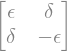

In [27]:
eps, delta = sympy.symbols("epsilon, delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

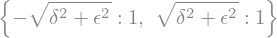

In [28]:
H.eigenvals()

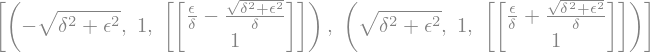

In [29]:
H.eigenvects()

`eigenvals`方法的返回值是一个字典，每个特征值是一个键，对应的值是该特征值的重数（multiplicity）。这里的两个特征值重数都是1。`eigenvects`方法返回的是一个列表，其中每一个元素是一个元组，这个元组包含特征值、特征值的重数和特征向量列表。

In [30]:
(_, _, evec1), (_, _, evec2) = H.eigenvects()

In [31]:
(evec1[0].T * evec2[0]).expand()

#### **数值计算**

对于较大的方程组，必须使用完全数值化的方法，可以使用SciPy线性代数包中的`la.eigvals`和`la.eig`函数。Hermitian矩阵和实数对称矩阵具有实数特征值，对于这类矩阵，使用`la.eigvalsh`和`la.eigh`函数更有优势。

In [32]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)

In [33]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [34]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [35]:
la.eigh(A)

(array([-1.75902942,  3.40592034, 13.35310908]),
 array([[ 0.90353276, -0.04009445,  0.42663918],
        [-0.24498225, -0.8651975 ,  0.43751227],
        [-0.35158534,  0.49982569,  0.79155671]]))

## 非线性方程
---

根据定义，线性方程满足可加性$f(x+y)=f(x)+f(y)$和齐次性$f(\alpha x)=\alpha f(x)$。非线性函数不满足这些条件。在自然科学和工程科学中，很多系统本质上是非线性的。

### 单变量非线性方程

与线性方程不同，没有通用的方法得到非线性方程的一个或多个解。从分析上看，只有特定形式的方程额可以精确求解。例如，对于四阶及以下多项式，可以通过解析方法进行求解。另外，包含三角函数以及其它基本函数的一些方程也可以通过解析的方法进行求解。在Sympy中，可以使用sympy.solve函数对很多可以解析的单变量非线性方程进行求解。

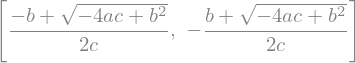

In [36]:
x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

一般情况下，非线性方程是无法解析求解的。例如$\sin x=x$是超越方程，不存在代数解。

In [37]:
try:
    sympy.solve(sympy.sin(x) - x, x)
except NotImplementedError:
    print("No algorithms are implemented to solve equation")

No algorithms are implemented to solve equation


在这种情况下，需要使用各种数值方法。首先绘制图形，这可以帮助我们得到有关方程解的数量以及大概位置的线索。在使用数值方法寻找方程近似跟的时候，通常需要这些信息。

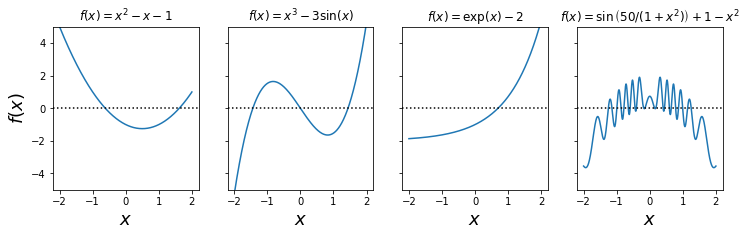

In [38]:
x = np.linspace(-2, 2, 1000)

# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

为了找到方程解的近似位置，可以从众多[数值求解方法](https://zh.wikipedia.org/zh-hans/数值分析)中选择一种。这些方法通常使用**迭代**的方式，计算函数在某个连续区域的值，直到算法收敛到某个所需的精度。有两种标准的方法演示了数字求根方法的基本思想：[二分法](https://zh.wikipedia.org/zh-hans/二分法_(數學))和[牛顿法](https://zh.wikipedia.org/zh-hans/牛顿法)。

#### **二分法**

Text(0.5, 1.0, 'Bisection method')

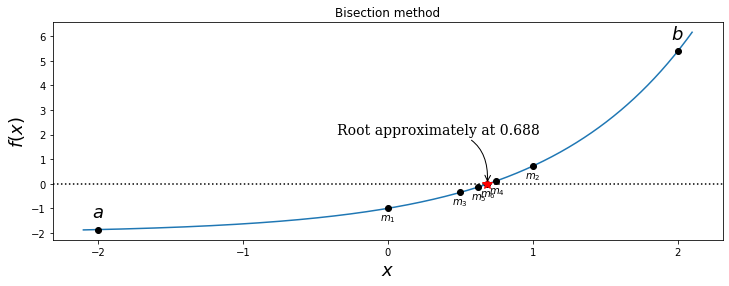

In [39]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1  # 期望精度
a, b = -2, 2  # 初始尝试解
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:  # 迭代求解
    m = a + (b - a)/2
    fm = f(m)
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1
    if np.sign(fa) == np.sign(fm):  # 判断中值符号
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")


#### 牛顿法

牛顿法的收敛速度比二分法更快。二分法只使用每个点函数值的符号，牛顿法使用$f(x)$的一阶泰勒展开式$f(x)=f(x_0)+(x-x_0)f'(x_0)$来近似函数$f(x)$。一阶泰勒展开式是一个线性函数，很容易找到它的根$x_0-\frac{f(x_0)}{f'(x_0)}$。需要注意的潜在问题是，如果存在某些点$x_k$使得$f'(x_k)=0$，该方法会失效。下面的例子演示了如何使用牛顿法求方程'$\exp(x)-2=0$的根，其中使用了SymPy来计算$f(x)$的导数。

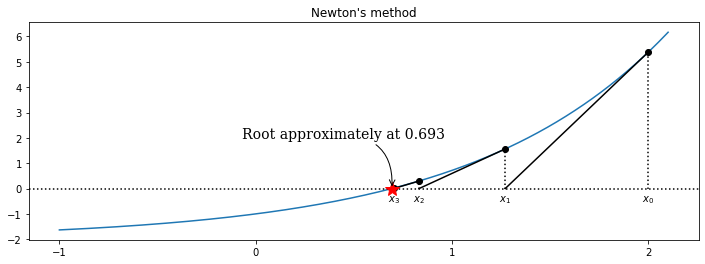

In [40]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([-1, 0, 1, 2])

牛顿法存在的潜在问题是，需要在每次迭代中计算函数值和函数的导数值。在上个示例中，我们使用SymPy通过符号来计算导数。在全数值的实现中，这显然是不可能的。此外，工程和科学计算中$f(x)$的表达式未必是已知的。所以我们需要用数值方法求导数的近似值。牛顿法的一种变体割线法（secant method），使用函数的前两个计算值来获得函数当前值的线性近似值，该线性近似值可用于计算根的最新估计值。割线法的迭代公式是：

$$x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k)-f(x_{k-1})}$$

更先进的数值求根方法通常是二分法或者牛顿法的变形或者结合，例如函数的高阶插值。

SciPy的optimize模块提供了多个用于数值求根的函数。`optimize.bisect`和`optimize.newton`函数实现了变体形式的二分法和牛顿法。`optimize.bisect`有三个参数：第一个函数是需要求解的方程的数学函数；第二个和第三个参数是二分法的初始区间的下限和上限。需要注意，函数在初始区间上下限处的值的符号必须不同。

In [41]:
f = lambda x: np.exp(x) - 2
optimize.bisect(f, -2, 2)

`optimize.newton`函数的第一个参数也是待求解的函数，第二个参数是函数解的初始猜测值。还有一个可选的参数fprime，用于指定函数的导数。如果给出了fprime，则使用牛顿法，否则使用割线法。

In [42]:
x_guess = 2
f = lambda x: np.exp(x) - 2
fprime = lambda x: np.exp(x)
optimize.newton(f, x_guess, fprime)  # 牛顿法

In [43]:
optimize.newton(f, x_guess)  # 割线法 

SciPy的optimize模块还提供了其它函数。特别是`optimize.brentq`和`optimize.brenth`函数，它们都是二分法的高级变体。[Brent方法](https://en.wikipedia.org/wiki/Brent%27s_method)通常被认为是首选的求根方法。

In [44]:
optimize.brentq(f, -2, 2)

### 非线性方程组

非线性方程组无法写成矩阵乘法的形式。我们可以将多元非线性方程组表示成向量值函数（vector-valued function），如$f:\mathbb{R}^N \rightarrow \mathbb{R}^N $，这表示一个N维向量映射到另一个N维向量。多变量方程组相比单变量方程更难以求解，没有严格保证收敛到某个解的方法。在后续的章节中，我们将尝试用神经网络求解非线性方程组。

当变量数目只有2个时，我们仍然可以使用作图的方法，大致确定解的范围。例如，如下包含$x$和$y$两个变量的非线性方程组：
$$\begin{cases} x + y^2 = 4 \\
e^x + xy = 3 \end{cases}$$

Text(0.5, 0, '$Z$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
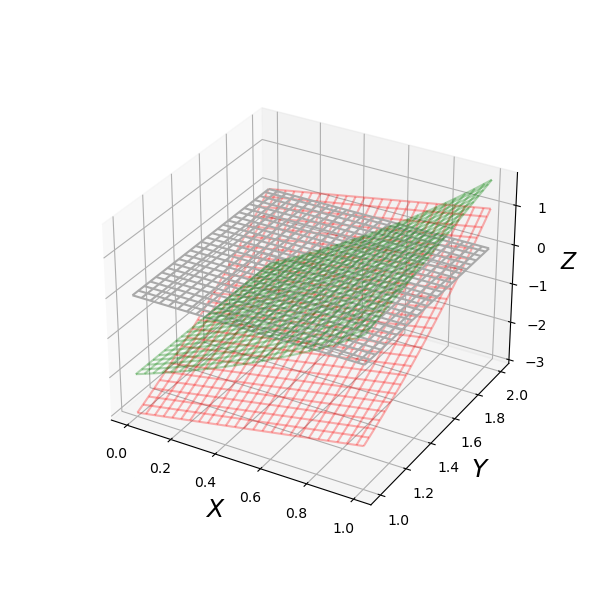

In [45]:
# 交互式绘图
%matplotlib widget

x = np.linspace(0, 1, 100)
y = np.linspace(1, 2, 100)
X, Y = np.meshgrid(x, y)
Z1 = X + Y**2 - 4
Z2 = np.exp(X) + X*Y - 3
Z3 = np.zeros_like(Z1)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': '3d'})

ax.plot_wireframe(X, Y, Z1, rstride=4, cstride=4, color="red", alpha=0.3)
ax.plot_wireframe(X, Y, Z2, rstride=4, cstride=4, color="green", alpha=0.3)
ax.plot_wireframe(X, Y, Z3, rstride=4, cstride=4, color="darkgrey")

ax.set_xlabel(r'$X$', fontsize=18)
ax.set_ylabel(r'$Y$', fontsize=18)
ax.set_zlabel(r"$Z$", fontsize=16)

在这个示例中，通过变量替换$x=4-y^2$，多变量方程组可以化简为一个单变量方程$e^{4-y^2} + (4-y^2)y - 3= 0$。

In [46]:
f = lambda y: np.exp(4-y**2) + (4-y**2)*y - 3
sol_y = optimize.brentq(f, 0, 2)
sol_x = 4 - sol_y**2
sol_x , sol_y

当变量的数目增加时，计算的难度也会增加。求解单变量方程的方法并不能直接推广到多变量的情况。二分法不能直接推广到多变量方程组，牛顿法可以用于多变量问题。在这种情况下，迭代方程是$x_(k+1)=x_k-J_f(x_k)^{-1}f(x_k)$，其中$J_f(x_k)$是函数$f(x)$的[雅可比矩阵](https://zh.m.wikipedia.org/zh-hans/雅可比矩阵)（Jacobian Matrix），其中的元素是$[J_f(x_k)]_{ij}=\delta f_i(x_k) / \delta x_j$。雅可比矩阵类似于多元函数的导数。该方法只需要求解线性方程组$J_f(x_k)\delta x_k = -f(x_k)$，然后使用$x_{k+1}=x_k+\delta x_k$，而不需要求雅可比矩阵的逆。

与单变量方程组中牛顿法的割线法变体一样，也有多变量函数的变体，可以根据函数先前的计算来估计函数的当前值，从而避免计算雅可比矩阵。[Broyden法](https://en.wikipedia.org/wiki/Broyden%27s_method)就是这类多变量方程组的割线更新法的典型例子。

在SciPy模块中，`broyden1`和`broyden2`是两个使用不同Jacobian近似值实现Broyden法的函数；而`optimize.fsolve`则提供了一种类似牛顿法的实现，该函数由一个可选参数用于指定雅各可比矩阵。

In [47]:
def f(x):
    return [x[0] + x[1]**2 - 4, np.exp(x[0]) + x[0]*x[1] - 3]

sol1 = optimize.broyden1(f, [1, 1])
print(sol1)
sol2 = optimize.broyden2(f, [1, 1])
print(sol2)
sol3 = optimize.fsolve(f, [1, 1])
print(sol3)

[ 1.72271116 -1.5090688 ]
[0.6203445  1.83838392]
[0.62034452 1.83838393]


与单变量非线性牛顿方程的牛顿法一样，解的初始猜测值非常重要，不同的初始猜测值可能会导致找到不同的方程解。求解非线性方程是一项很复杂的工作，各种类型的可视化通常对于构建特定问题特征的理解非常有用。

#### 超定非线性方程组

上述示例中，变量和约束条件一致。如果非线形问题的约束条件多于变量数目，与线性方程组类似，精确解可能不存在，此时需要寻找方程组的最优近似解。[高斯牛顿迭代法](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm)是一个常用选择。